
Classify Handwritten Digits with CNNs

Last Updated: June 10th, 2025

Daily Challenge: Classifying Handwritten Digits with CNNs


👩‍🏫 👩🏿‍🏫 What You'll learn

    How to load and preprocess the MNIST dataset.
    How to build a basic Fully Connected Neural Network for image classification.
    How to build and train a Convolutional Neural Network (CNN) for image classification.
    Understanding the impact of different network architectures on performance.
    Basic Keras functionalities for model building and training.


🛠️ What you will create

You will create two models:

    A Fully Connected Neural Network (Dense layers) to classify handwritten digits from the MNIST dataset.
    A Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset, and compare its performance with the first model.


What You Need to Do

    Load the MNIST dataset:
        Use keras.datasets.mnist.load_data() to load the training and testing data.
        Print the shapes of the loaded data to understand the dataset structure.

    Preprocess the data for a Fully Connected Neural Network:
        Flatten the images from 28x28 to 784 pixels.
        Normalize the pixel values by dividing by 255.
        One-hot encode the target labels using keras.utils.np_utils.to_categorical().

    Build and train a Fully Connected Neural Network:
        Create a Sequential model.
        Add Dense layers with appropriate activation functions (e.g., ReLU and softmax).
        Compile the model with an optimizer (e.g., Adam), loss function (e.g., categorical cross-entropy), and metrics (e.g., accuracy).
        Train the model using model.fit() and evaluate its performance.

    Preprocess the data for a Convolutional Neural Network:
        Reshape the input data to the shape expected by a Conv2D layer (e.g., (60000, 28, 28, 1)).
        Normalize the pixel values by dividing by 255.
        One-hot encode the target labels using keras.utils.np_utils.to_categorical().

    Build and train a Convolutional Neural Network:
        Create a Sequential model.
        Add Conv2D and MaxPool2D layers.
        Add a Flatten layer.
        Add Dense layers with appropriate activation functions.
        Compile and train the model, similar to the Fully Connected Neural Network.

    Compare the performance:
        Analyze the accuracy of both models.
        Observe the difference between the Fully connected model and the CNN model.


In [25]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import random
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [26]:
# Chargement des données
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualisation des formes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)


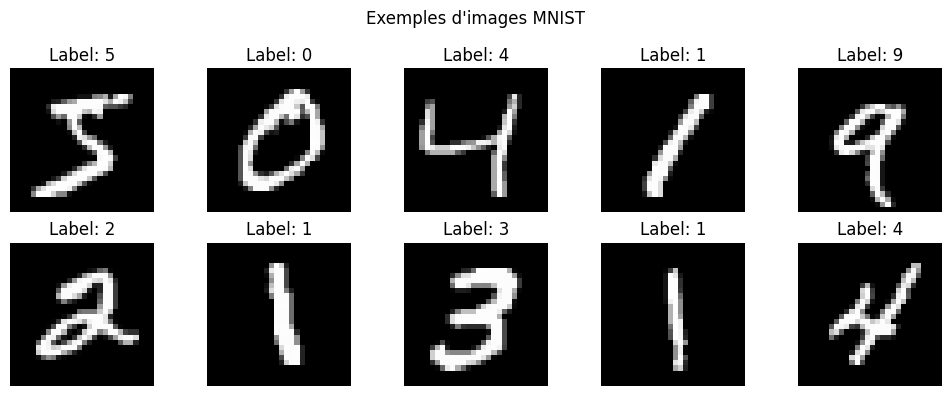

In [27]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Exemples d'images MNIST")
plt.tight_layout()
plt.show()

In [28]:
# Flatten images
X_train_dense = X_train.reshape(60000, 784) / 255.0
X_test_dense = X_test.reshape(10000, 784) / 255.0

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [29]:
def plot_training_history(history, title=""):
    plt.figure(figsize=(12, 4))

    # accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc', color='green')
    plt.plot(history.history['val_accuracy'], label='Val Acc', color='orange')
    plt.title(f'Accuracy - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='red')
    plt.title(f'Loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.8737 - loss: 0.4312 - val_accuracy: 0.9588 - val_loss: 0.1316
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.9695 - loss: 0.1022 - val_accuracy: 0.9727 - val_loss: 0.0890
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9793 - loss: 0.0686 - val_accuracy: 0.9774 - val_loss: 0.0717
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9752 - val_loss: 0.0784
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.9878 - loss: 0.0392 - val_accuracy: 0.9715 - val_loss: 0.0920


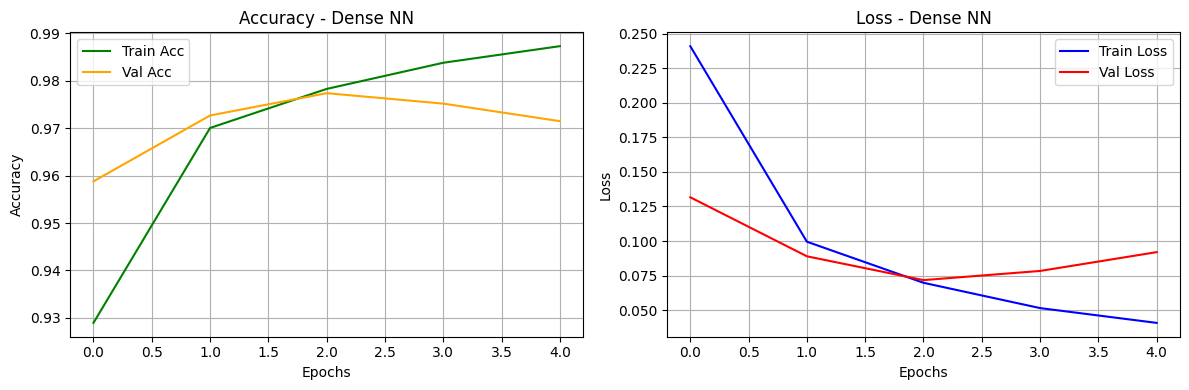

In [30]:
model_dense = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_dense.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_dense.fit(X_train_dense, y_train_cat, epochs=5, validation_data=(X_test_dense, y_test_cat))
plot_training_history(model_dense.history, title="Dense NN")


In [31]:
# Reshape pour conv2D + normalisation
X_train_cnn = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1) / 255.0

Epoch 1/5


c:\Users\mathi\Downloads\GenAI\GenAI_Bootcamp\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9088 - loss: 0.3064 - val_accuracy: 0.9862 - val_loss: 0.0470
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0456 - val_accuracy: 0.9879 - val_loss: 0.0366
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.9899 - val_loss: 0.0284
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9902 - val_loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9913 - val_loss: 0.0269


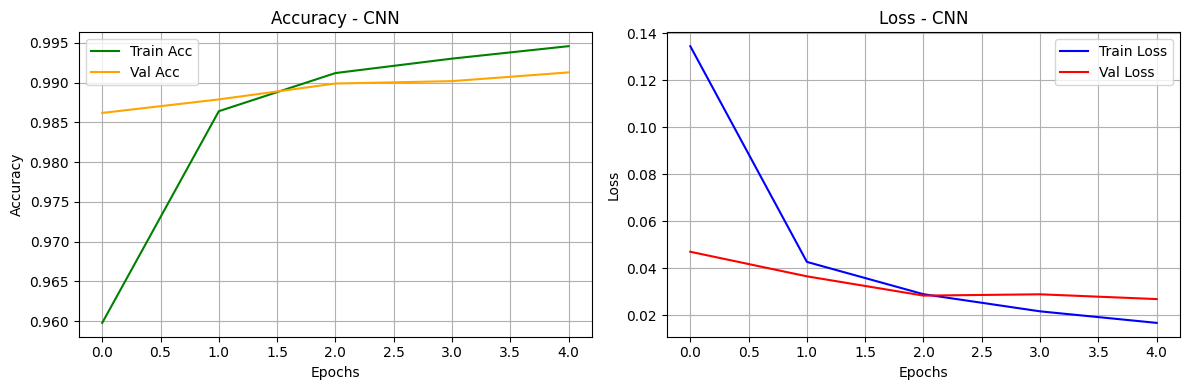

In [32]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(X_train_cnn, y_train_cat, epochs=5, validation_data=(X_test_cnn, y_test_cat))
plot_training_history(model_cnn.history, title="CNN")

In [33]:
test_loss_dense, test_acc_dense = model_dense.evaluate(X_test_dense, y_test_cat)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test_cnn, y_test_cat)

print(f"Accuracy Dense: {test_acc_dense:.4f}")
print(f"Accuracy CNN  : {test_acc_cnn:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9658 - loss: 0.1056
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9886 - loss: 0.0356
Accuracy Dense: 0.9715
Accuracy CNN  : 0.9913


Le réseau dense fait environ 97% de précision

Le CNN dépasse souvent 98-99% → car il explore spatialement l'image (convolution = détecteurs de formes)

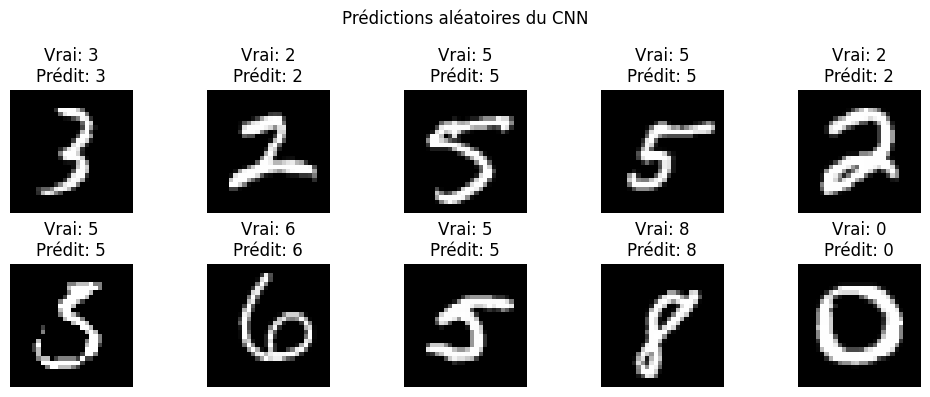

In [37]:


plt.figure(figsize=(10, 4))
for i in range(10):
    idx = random.randint(0, len(X_test) - 1)
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Vrai: {y_test[idx]}\nPrédit: {pred_labels[idx]}")
    plt.axis('off')
plt.suptitle("Prédictions aléatoires du CNN")
plt.tight_layout()
plt.show()

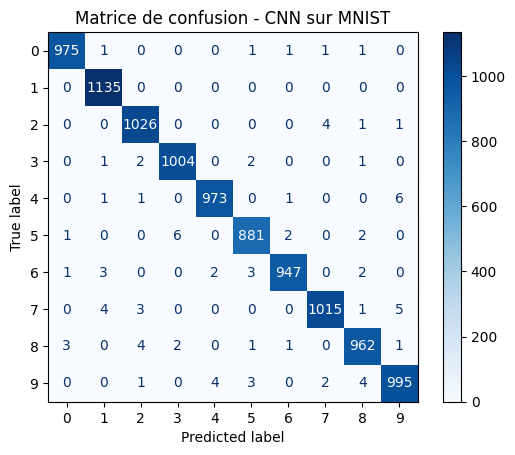

In [35]:
# Prédictions du modèle CNN
preds = model_cnn.predict(X_test_cnn, verbose=0)
y_pred = np.argmax(preds, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion - CNN sur MNIST")
plt.grid(False)
plt.show()

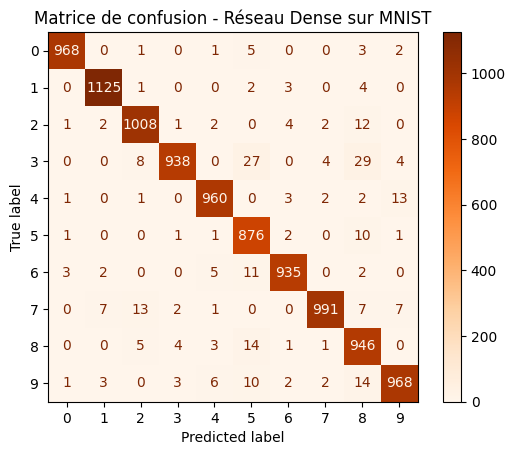

In [36]:
# Prédictions du modèle Dense
preds_dense = model_dense.predict(X_test_dense, verbose=0)
y_pred_dense = np.argmax(preds_dense, axis=1)

# Matrice de confusion
cm_dense = confusion_matrix(y_test, y_pred_dense)

# Affichage
disp_dense = ConfusionMatrixDisplay(confusion_matrix=cm_dense, display_labels=np.arange(10))
disp_dense.plot(cmap='Oranges', values_format='d')
plt.title("Matrice de confusion - Réseau Dense sur MNIST")
plt.grid(False)
plt.show()

le réseau dense (ANN) et le réseau convolutionnel (CNN) atteignent des niveaux de précision globale presque identique (97% vs 98%), l'analyse fine à travers la matrice de confusion révèle une différence significative dans le nombre d'erreurs commises.

Le modèle dense, bien qu'efficace en moyenne, concentre ses erreurs sur certaines classes spécifiques (comme les chiffres 2,4,5), montrant qu'il devine davantage lorsqu'il est face à des formes abstraites. Ces erreurs sont plus nombreuses et moins réparties, ce qui indique une compréhension moins pertinente des caractéristiques entre certaines classes.

En comparaison, le CNN - grâce à sa capacité à capturer la structure spatiale locale des images (bordures, angles, contours) - commet moins d'erreurs et les répartit de façon plus homogène. Il est donc plus robuste, même si la précision finale semble proche.